In [12]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('../../data/output_from_CleanNotebook_folder/trian_qso_wo_petro_v2.csv')

X = data[['u - g', 'u - r', 'u - i', 'u - z', 'u - j', 'u - k',
       'u - ch1', 'u - ch2', 'g - r', 'g - i', 'g - z', 'g - k', 'g - j',
       'g - ch1', 'g - ch2', 'r - i', 'r - z', 'r - j', 'r - ch1', 'r - k',
       'r - ch2', 'i - z', 'i - j', 'i - k', 'i - ch1', 'i - ch2', 'z - j',
       'z - k', 'z - ch1', 'z - ch2', 'j - ch1', 'j - ch2', 'j - k', 'k - ch1',
       'k - ch2', 'ch1 - ch2']]

y = data['class_bin']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [15]:
filename = '../../saved_models/faint/rfc_RScv_faint.sav'
model = pickle.load(open(filename,'rb'))

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = model.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.961


In [7]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

gw2     0.088041
zk      0.086704
zw1     0.079102
zw2     0.071076
w1w2    0.065973
iw2     0.060098
jw2     0.059423
rw2     0.050901
ik      0.048419
jk      0.045836
jw1     0.043621
iw1     0.038086
gw1     0.037090
rw1     0.032597
gk      0.023623
kw2     0.021190
rk      0.019669
zj      0.019452
uw2     0.017618
ij      0.012636
uw1     0.009216
uk      0.007158
ug      0.006488
uz      0.006097
ui      0.005933
ur      0.004619
gr      0.004512
kw1     0.004445
gi      0.004429
ri      0.004406
uj      0.004352
gj      0.003924
rj      0.003493
rz      0.003426
iz      0.003362
gz      0.002986
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


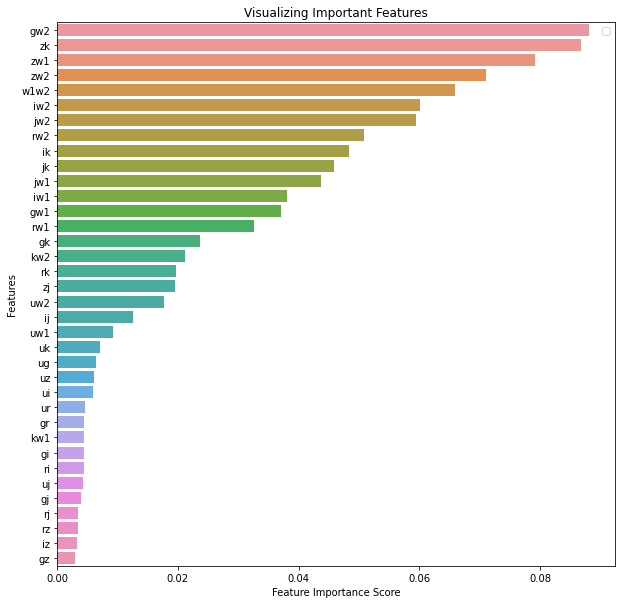

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

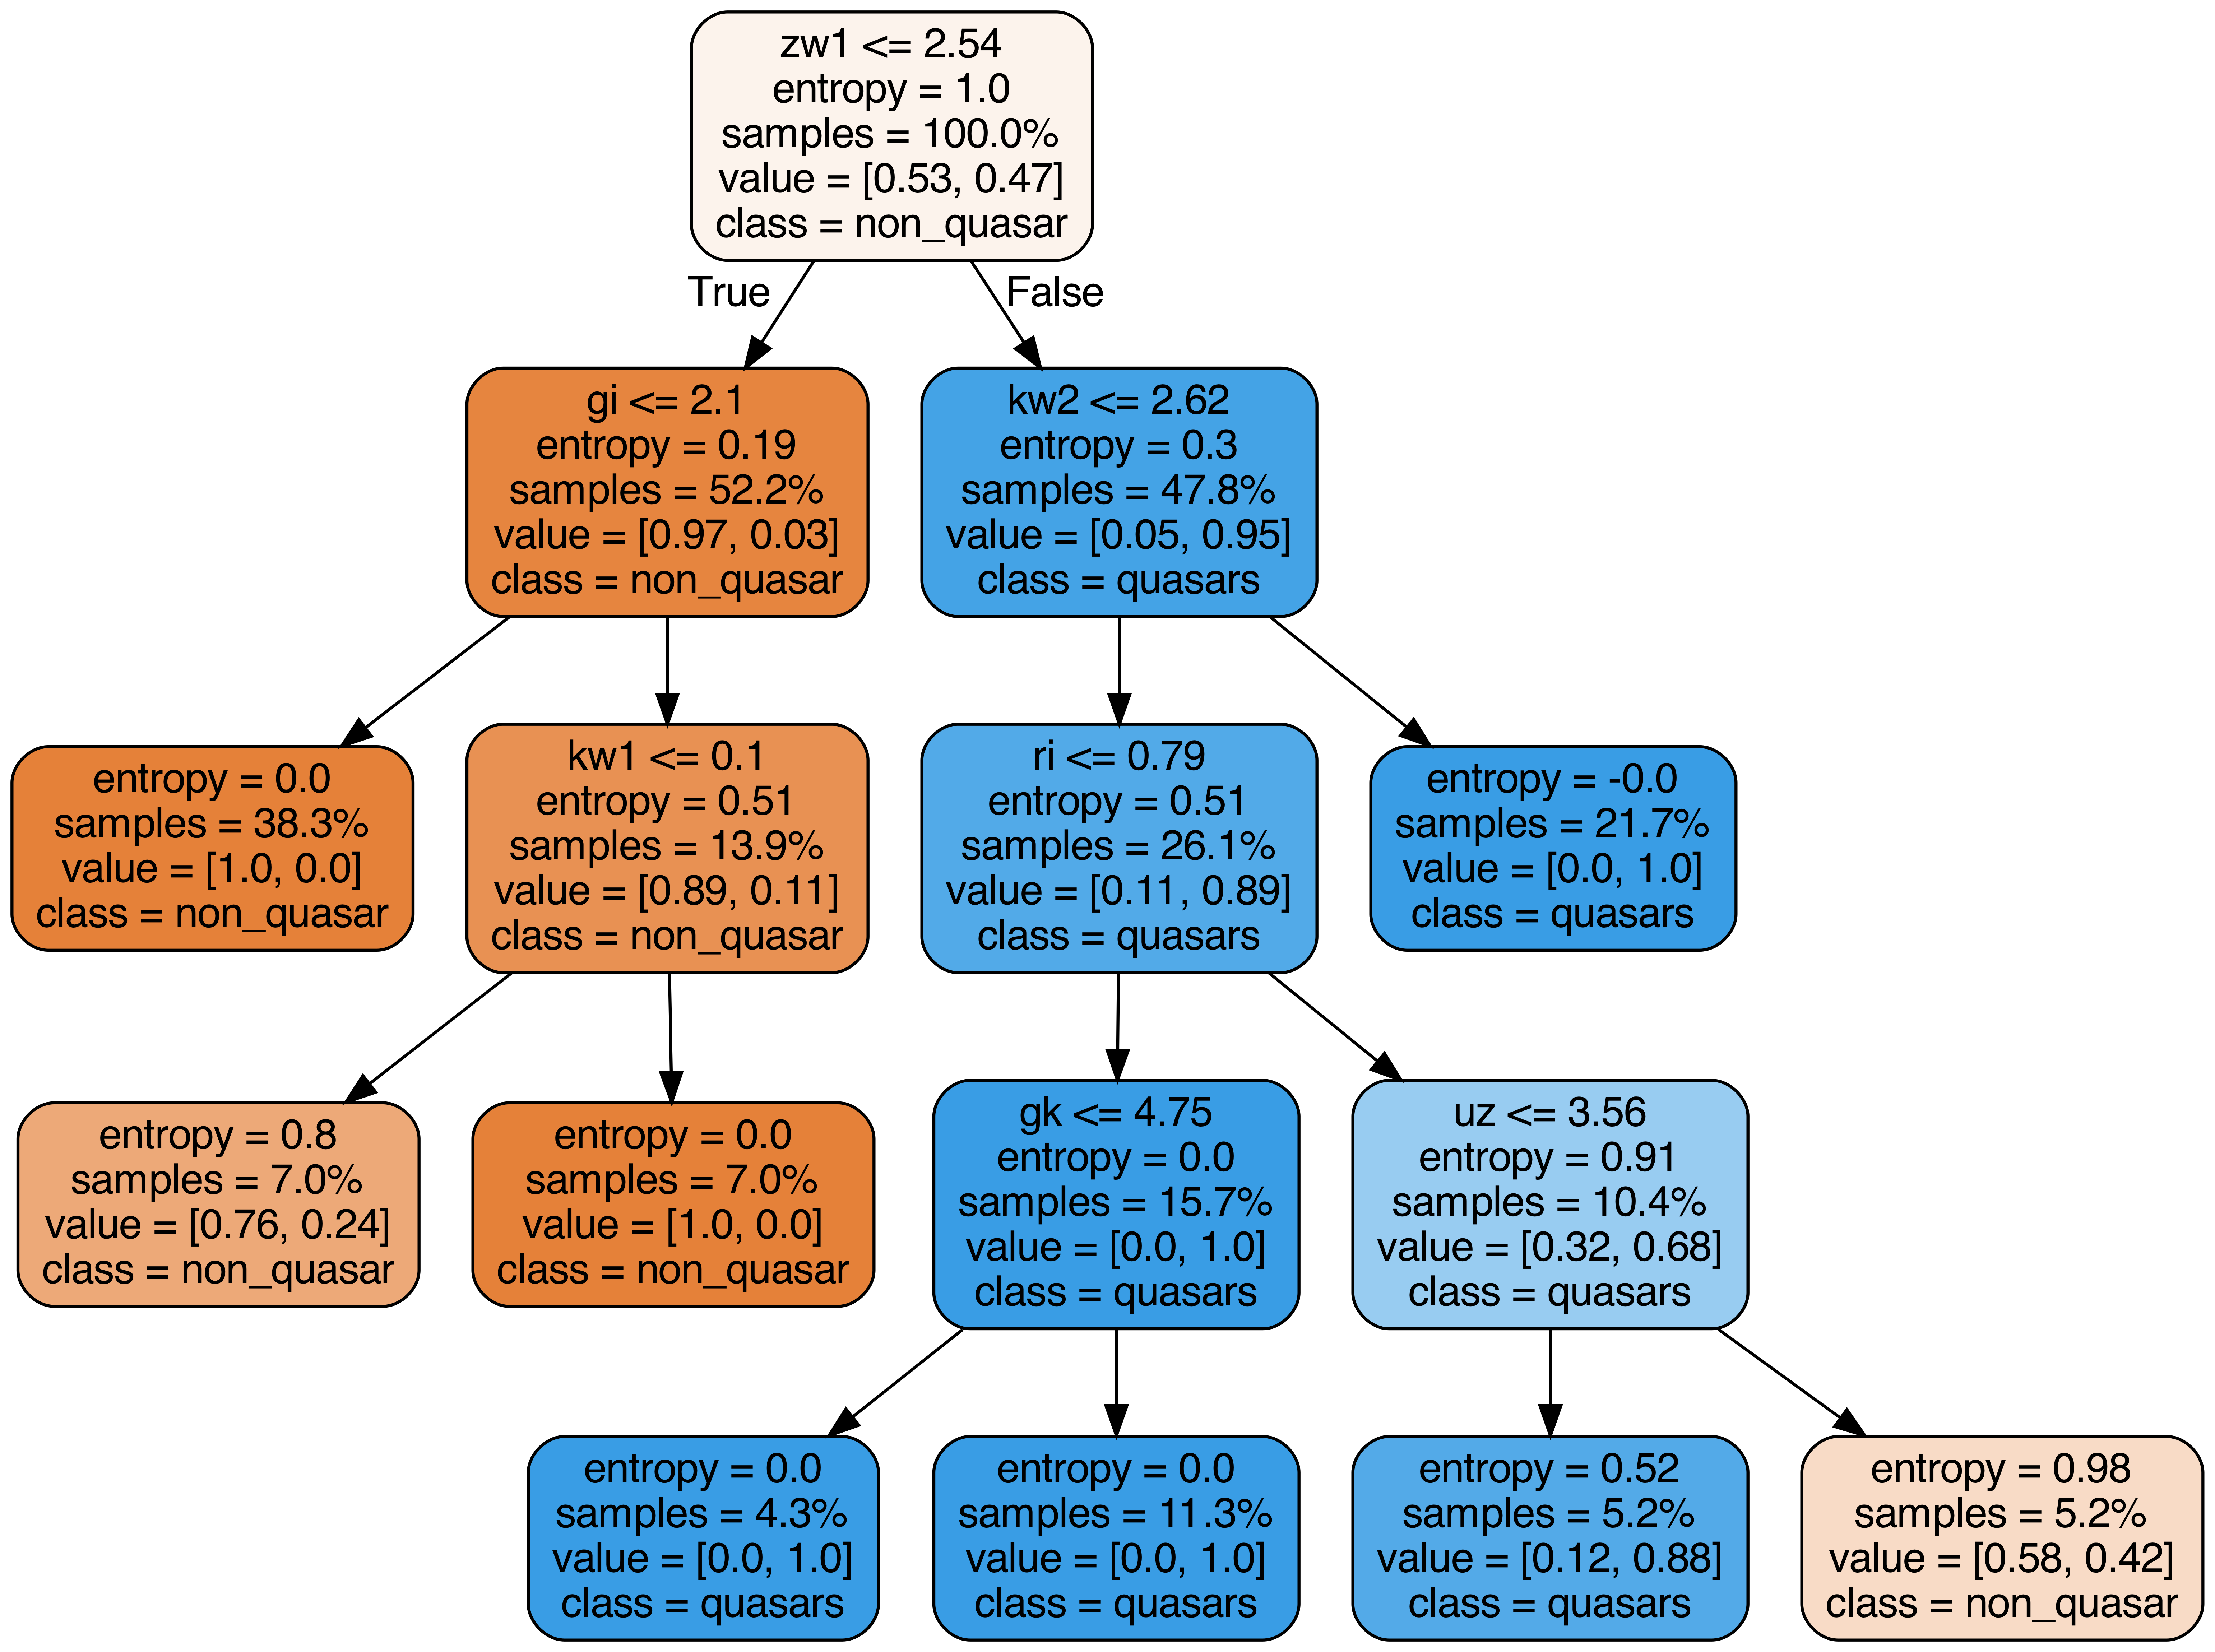

In [11]:
#picking one tree from the clf model
estimator = model.estimators_[1]

target_names = ['non_quasar','quasars']

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = True, 
                precision = 2, filled = True,impurity = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')